********************************************
# LOGISITC REGRESSION
********************************************

# Definition
This is a method when a result of some empircal data produes a one or nought result. The logisitc regression is preferred to the simple step activation function when the data can be nuanced in measurement. The differences in betweeen some of the flowers is very small. As a demonstration you can see how Logisitic Regression differes from Linear Regression:

![Logistic Regression](https://miro.medium.com/max/1400/1*Ubge8qVlc4Xk58H1oMp4Zw.jpeg)

In [1]:
using CSV, Plots
theme(:juno)

In [2]:
dat = CSV.read("iris_data.csv")
dat[1:5,:]

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,String
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


************************************
# Seperating Our Data
************************************
Below we simply use list comprehension to seperate the data into three subsets depending on the string whether or not it is:
**setosa, virginica, or versicolor**. Every subset is now **one-hot encoded** depending on the last column.

In [3]:
data1 = [[x[1],x[2],1.0,x[3]=="setosa" ? 1.0 : 0.0]
        for x in zip(dat[:,1],dat[:,3],dat[:,5])]
data1[10:15]

6-element Array{Array{Float64,1},1}:
 [4.9, 1.5, 1.0, 1.0]
 [5.4, 1.5, 1.0, 1.0]
 [4.8, 1.6, 1.0, 1.0]
 [4.8, 1.4, 1.0, 1.0]
 [4.3, 1.1, 1.0, 1.0]
 [5.8, 1.2, 1.0, 1.0]

In [4]:
data2 = [[x[1],x[2],1.0,x[3]=="virginica" ? 1.0 : 0.0]
        for x in zip(dat[:,1],dat[:,3],dat[:,5])]
data2[10:15]

6-element Array{Array{Float64,1},1}:
 [4.9, 1.5, 1.0, 0.0]
 [5.4, 1.5, 1.0, 0.0]
 [4.8, 1.6, 1.0, 0.0]
 [4.8, 1.4, 1.0, 0.0]
 [4.3, 1.1, 1.0, 0.0]
 [5.8, 1.2, 1.0, 0.0]

In [5]:
data3 = [[x[1],x[2],1.0,x[3]=="versicolor" ? 1.0 : 0.0]
        for x in zip(dat[:,1],dat[:,3],dat[:,5])]
data3[10:15]

6-element Array{Array{Float64,1},1}:
 [4.9, 1.5, 1.0, 0.0]
 [5.4, 1.5, 1.0, 0.0]
 [4.8, 1.6, 1.0, 0.0]
 [4.8, 1.4, 1.0, 0.0]
 [4.3, 1.1, 1.0, 0.0]
 [5.8, 1.2, 1.0, 0.0]

# Visualizing the Data

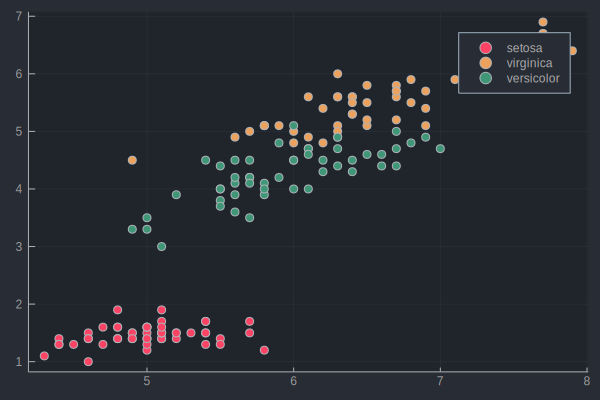

In [6]:
scatter([(x[1],x[2]) for x in data1 if x[4]==1.0], label = "setosa")
scatter!([(x[1],x[2]) for x in data2 if x[4]==1.0], label = "virginica")
scatter!([(x[1],x[2]) for x in data3 if x[4]==1.0], label = "versicolor")

*******************
# Functions
*******************

In [7]:
σ(z) = 1.0/(1.0+exp(-z))

function loss_function(weights, data)
    return (-1.0/size(data)[1])*sum([x[4]*log(σ(weights'*x[1:3]))+(1.0-x[4])*log(1.0-σ(weights'*x[1:3]))
                                for x in data])
end

function ∇L(weights,data)
    w1 = (1/size(data)[1])*sum([(σ(weights'x[1:3]) - x[4])*x[1] for x in data])
    w2 = (1/size(data)[1])*sum([(σ(weights'x[1:3]) - x[4])*x[2] for x in data])
    w3 = (1/size(data)[1])*sum([(σ(weights'x[1:3]) - x[4])*x[3] for x in data])
    return [w1, w2, w3]
end

function gradient_descent(data, α, ϵ)
    i = 1.0
    weights = rand(3)
    loss_history = []
    error_points = [(i, loss_function(weights, data))]
    while loss_function(weights, data) > ϵ && i < 100.0
        weights -= α.*∇L(weights, data)
        i += 1.0
        push!(loss_history,loss_function(weights,data))
        push!(error_points, (i, loss_function(weights, data)))
    end
    return weights, error_points, loss_history
end

function predict(W, x)
    if σ(W'*x[1:3]) >.50
        return 1
    else
        return 0
    end
end

function train(x)
    W1, P1 = gradient_descent(data1, 1.0, 0.00001)
    W2, P2 = gradient_descent(data2, 1.0, 0.00001)
    W3, P3 = gradient_descent(data3, 1.0, 0.00001)
    return W1, W2, W3
end

function predict_multi(x)
    W1, W2, W3 = train(x)
    return argmax([predict(W1, x), predict(W2, x), predict(W3, x)])
end

predict_multi (generic function with 1 method)

*******************
# Steps to Logisitc Regression
*******************
1) Z = weights(transposed) x inputs + bias

2) Apply the sigmoid function to the weighted sum Z

3) Find the cost associated to predicting the wrong input

4) Compute the gradient of the weights with respect to this individual instance of cost

5) Adjust the weights by subtracting by this new gradient cost value

6) continue this process until the weights accurately predict our desired outcome

In [8]:
W1, P1, L1 = gradient_descent(data1, 1.0, 0.00001)
W2, P2, L2 = gradient_descent(data2, 1.0, 0.00001)
W3, P3, L3 = gradient_descent(data3, 1.0, 0.00001)

([-1.37108, 2.14796, 0.770373], Tuple{Float64,Float64}[(1.0, 3.30168), (2.0, 9.3869), (3.0, 3.34486), (4.0, 5.04161), (5.0, 8.48238), (6.0, 2.44197), (7.0, 6.5476), (8.0, 7.61073), (9.0, 1.57921), (10.0, 7.77213)  …  (91.0, 1.04871), (92.0, 3.60138), (93.0, 3.7324), (94.0, 6.56936), (95.0, 0.872785), (96.0, 1.41052), (97.0, 5.46797), (98.0, 1.33514), (99.0, 5.44865), (100.0, 1.31083)], Any[9.3869, 3.34486, 5.04161, 8.48238, 2.44197, 6.5476, 7.61073, 1.57921, 7.77213, 6.88136  …  1.04871, 3.60138, 3.7324, 6.56936, 0.872785, 1.41052, 5.46797, 1.33514, 5.44865, 1.31083])

In [9]:
predict_multi(data1[130])

2

*****************************************
# Visualizing our Process
*****************************************

Below the two graphs visualize not only what our weight were and are now but as well the cost over time as the weights were adjusting. You can see even as the **learning rate** was as low as **0.00001**.

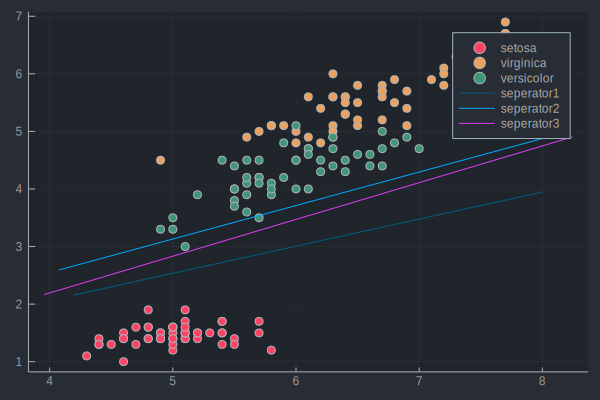

In [10]:
plot!(x-> -(W1[1]/W1[2])*x - (W1[3]/W1[2]), label = "seperator1")

plot!(x-> -(W2[1]/W2[2])*x - (W2[3]/W2[2]), label = "seperator2")

plot!(x-> -(W3[1]/W3[2])*x - (W3[3]/W3[2]), label = "seperator3")

For the Cost graph notice that different rates optimize in different ways or rates. Some measurements or inputs can better predict classification of objects aas one would expect.

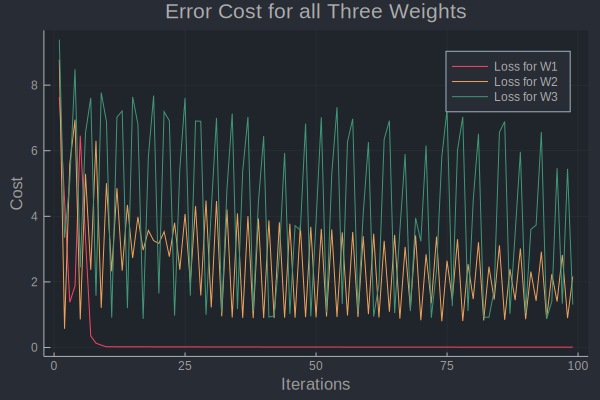

In [11]:
plot(L1, label = "Loss for W1", title="Error Cost for all Three Weights",xaxis="Iterations",yaxis="Cost")
plot!(L2, label = "Loss for W2")
plot!(L3, label = "Loss for W3")